# Trabajo en clase 03
# Jose Javier Fernández González 2020425930
## Potencial Eléctrico

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase 03.
- **Valor total 18 puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

## Cálculo de potencial eléctrico por diferencias finitas (con controles interactivos)

En regiones del espacio que no contienen carga eléctrica, 
el potencial eléctrico obedece la ecuación de Laplace:

$$
\nabla^2 \cdot V = 0
$$

Seguidamente se va a aplicar el método de diferencias finitas para resolver la ecuación de Laplace en una placa cuadrada de lado L:

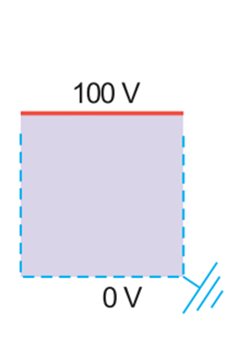

1. Defina dos arreglos que representen las dimensiones de la placa de lado `L = 5` dividida en `nPuntos = 100`. Utilice la finción np.linspace() para definir los arreglos. **Valor: 2 puntos**
2. Ahora use la función `np.meshgrid()` para definir la malla que representa la placa. Esta malla se usará para calcular el potencial sobre la placa. Lea la documentación de `np.meshgrid()` para entender la salida de la función y su aplicación. **Valor: 2 puntos**

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# funciones para la visualización interactiva
from ipywidgets import interactive, interact, FloatSlider, fixed
import ipywidgets as widgets
from IPython.display import display

In [12]:
# Discretización del espacio

nPuntos = 100

longitud = np.linspace(0,5,nPuntos)

lado_x, lado_y = np.meshgrid(longitud,longitud)

3. Ahora defina una malla en 2D que representa los valores iniciales en cada punto de la placa. Considere que el potencial inicial en la placa es cero. **Valor: 1 punto**
4. Ahora defina las condiciones de frontera en la malla de valores iniciales. Como se muestra en la figura de la placa, defina que el potencial en la primera fila tiene un valor de 100 V. **Valor: 1 punto**

In [13]:
# Valores iniciales

placa_0 = lado_x*0
placa_0[0] = np.linspace(100,100,nPuntos)



5. Ahora escriba una función que tome como valores de entrada la matriz de valores iniciales y un parámetro que representa el número de iteraciones `nIteraciones` que se van a realizar para encontrar la aproximación por diferencias finitas.
6. La función debe iterar `nIteraciones` veces sobre la malla de condiciones iniciales. 
7. Cada iteración recorre todos los puntos de la malla (a excepción de la primera fila) y actualiza cada entrada como el promedio del potencial de los vecinos más cercanos (valores de potencial para el vecindario arriba, abajo, izquierda y derecha.).
8. Retorne la malla actualizada una vez concluido el ciclo de iteraciones. **Valor: 6 puntos**

In [14]:
# Método de diferencias finitas y relajación

def AproximacionDF(matriz, nIteraciones):
    for iteracion in range(0,nIteraciones):
    
        for fila in range(1,len(matriz)-1):
            for columna in range(0,len(matriz)-1):
                # Consideración de los extremos
                if columna == 0:
                    izq = 0
                else:
                    izq = matriz[fila][columna-1]


                if columna == len(matriz):
                    der = 0
                else:
                    der = matriz[fila][columna+1]


                if fila == len(matriz):
                    aba = 0
                else:
                    aba = matriz[fila+1][columna]
                
                arr = matriz[fila-1][columna]  # El caso de arriba ya está considerado anteriormente

                matriz[fila][columna] = np.mean([arr, aba, izq, der])
    return matriz


9. Grafique los resultados obtenidos como una superficie. Use la función `plot_surface` para generar una superficie en 3D que representa el potencial en la placa. **Valor: 3 puntos**
10. Grafique los resultados obtenidos como curvas de nivel. Use la función `contour` para generar una superficie en 2D que representa el potencial en la placa. **Valor: 3 puntos**

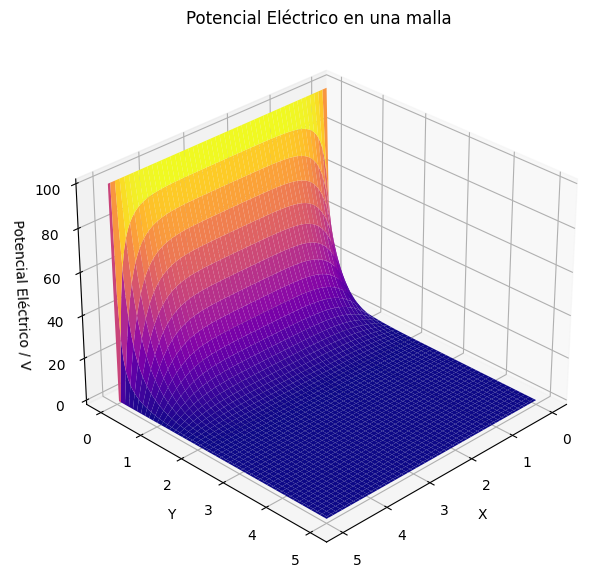

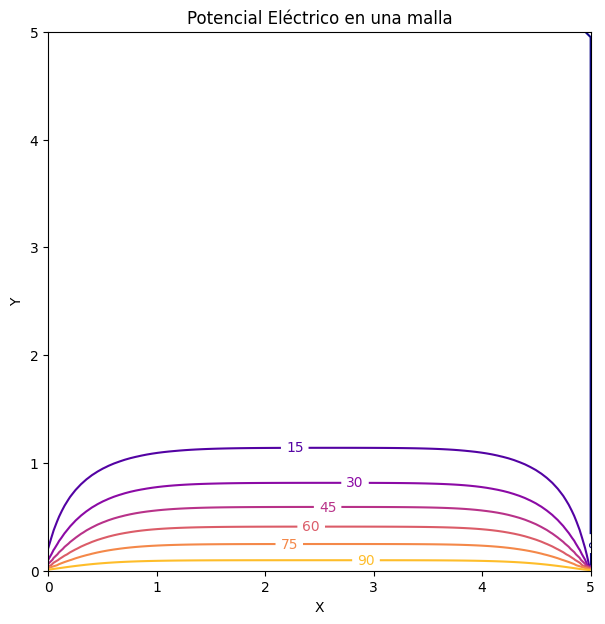

In [42]:
 
placa = AproximacionDF(placa_0, 10) # Aproximación a 10 iteraciones
    


fig, ax = plt.subplots(figsize=(7,7),subplot_kw={"projection": "3d"})
ax.view_init(30,45)
ax.plot_surface(lado_x,lado_y,placa, cmap="plasma")   
ax.set(
    xlabel="X",
    ylabel="Y",
    zlabel="Potencial Eléctrico / V",
    title="Potencial Eléctrico en una malla"
)

    


fig, ax = plt.subplots(figsize=(7,7))
CS = ax.contour(lado_x,lado_y,placa, cmap="plasma") 
ax.clabel(CS, inline=True, fontsize=10)
ax.set(
    xlabel="X",
    ylabel="Y",
    title="Potencial Eléctrico en una malla"
)
    
plt.show()

## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education